In [1]:
"""
Del analisis de los MRs anterior surgen las preguntas de CUALES son los mrs en las intersecciones,
CUALES son los mas frecuentes, etc.
"""

'\nDel analisis de los MRs anterior surgen las preguntas de CUALES son los mrs en las intersecciones,\nCUALES son los mas frecuentes, etc.\n'

In [2]:
import pandas as pd
import seaborn as sns

# sns.set_style("darkgrid")
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"]= (8, 6)

In [3]:
from compare_rules import generic_set_intersection, \
    fast_list_intersection, mrs_txs_interseccion_lev_1, \
    mrs_txs_frecuencia_mayor_set, mrs_txs_frecuencia_mayor_list, \
    mrs_frequency_map_from_mrs

from info_rules import all_mrs_from_transactions

import analysis_utils as autils

from typing import Dict, List, Tuple

In [4]:
transactions_newank = autils.read_clean_transactions("NEWAnk_len4_ALL_sub", "output/clean_transactions")

In [5]:
transactions_tpr = autils.read_clean_transactions("TPR1_len4_ALL_sub", "output/clean_transactions")

In [6]:
transactions_lrr = autils.read_clean_transactions("LRR1_len4_ALL_sub", "output/clean_transactions")

In [7]:
assert len(transactions_newank) == 32169
assert len(transactions_tpr) == 36389

In [8]:
mrs_newank = all_mrs_from_transactions(transactions_newank)
mrs_newank_unique = set(mrs_newank)

In [9]:
mrs_tpr = all_mrs_from_transactions(transactions_tpr)
mrs_tpr_unique = set(mrs_tpr)

In [10]:
mrs_lrr = all_mrs_from_transactions(transactions_lrr)
mrs_lrr_unique = set(mrs_lrr)

In [11]:
# --------

In [12]:
# Obtengo el frequency map por cada familia

In [13]:
freqs_newank = mrs_frequency_map_from_mrs(mrs_newank)

In [14]:
freqs_tpr = mrs_frequency_map_from_mrs(mrs_tpr)

In [15]:
freqs_lrr = mrs_frequency_map_from_mrs(mrs_lrr)

In [16]:
# Lista ordenada por frecuencia de los mas frecuentes

# TODO: Mover a .py
def top_frecuents(freqs: Dict[str, int]) -> List[Tuple[int, str]]:
    freqs_list = [ (f,v) for v,f in freqs.items() ]
    return sorted(freqs_list, reverse=True)

In [17]:
top_freqs_newank = top_frecuents(freqs_newank)

In [18]:
top_freqs_tpr = top_frecuents(freqs_tpr)

In [19]:
top_freqs_lrr = top_frecuents(freqs_lrr)

In [20]:
top_freqs_newank[:10]

[(19137, 'TPLH'),
 (17222, 'TALH'),
 (14329, 'LHLA'),
 (10934, 'GADV'),
 (9585, 'HLAA'),
 (9520, 'PLHL'),
 (9240, 'ADVN'),
 (8964, 'LLLE'),
 (8401, 'RTPL'),
 (8277, 'KLLL')]

In [21]:
top_freqs_tpr[:10]

[(7615, 'KALE'),
 (6888, 'KAIE'),
 (6521, 'ALEL'),
 (6155, 'ALAL'),
 (5741, 'EEAL'),
 (5728, 'EKAL'),
 (5404, 'YEEA'),
 (5250, 'NNLG'),
 (5096, 'AIEL'),
 (4892, 'EALE')]

In [22]:
top_freqs_lrr[:10]

[(26891, 'LDLS'),
 (18839, 'LNLS'),
 (15689, 'LSNN'),
 (14200, 'LSSN'),
 (12720, 'LSGN'),
 (12668, 'GEIP'),
 (12648, 'LSHN'),
 (12546, 'GSIP'),
 (12292, 'LSYN'),
 (12134, 'NLSG')]

In [23]:
# Guardo todo en un df para plotearlo. (Seguro lo podia hacer mas limpio desde el incio...)
def build_freq_data_df(freqs_by_family):
    freq_data = []
    for family, freqs in freqs_by_family.items():
        print(f"Processing family {family}")
        for mr, freq in freqs.items():
            freq_data.append((family, mr, freq))
    return pd.DataFrame(freq_data, columns=['family', 'mr', 'frequency'])



In [24]:
input_build_freq_data = {
    "NEWAnk": freqs_newank,
    "TPR1": freqs_tpr,
    "LRR1": freqs_lrr
}

df_frequencies = build_freq_data_df(input_build_freq_data)

Processing family NEWAnk
Processing family TPR1
Processing family LRR1


In [25]:
df_frequencies

,family,mr,frequency
0,NEWAnk,AAAE,2246
1,NEWAnk,AACE,405
2,NEWAnk,AAEG,1627
3,NEWAnk,AAGA,3168
4,NEWAnk,AAGK,799
...,...,...,...
472172,LRR1,AWMK,2
472173,LRR1,CDYM,2
472174,LRR1,TMWK,2
472175,LRR1,AHPW,2


In [26]:
df_frequencies[df_frequencies.family == "NEWAnk"].nlargest(10, 'frequency')

,family,mr,frequency
2495,NEWAnk,TPLH,19137
2918,NEWAnk,TALH,17222
2759,NEWAnk,LHLA,14329
94,NEWAnk,GADV,10934
3069,NEWAnk,HLAA,9585
10979,NEWAnk,PLHL,9520
15,NEWAnk,ADVN,9240
946,NEWAnk,LLLE,8964
1263,NEWAnk,RTPL,8401
139,NEWAnk,KLLL,8277


In [27]:
df_tops = df_frequencies[ df_frequencies.groupby('family')['frequency'].rank(ascending=False) <= 10 ]
df_tops.sample(5)

,family,mr,frequency
10979,NEWAnk,PLHL,9520
1263,NEWAnk,RTPL,8401
168824,TPR1,NNLG,5250
317578,LRR1,LSGN,12720
163285,TPR1,YEEA,5404


In [28]:
df_tops.loc[:,'family_mr'] = df_tops['family'] + "_" + df_tops['mr']

/tmp/ipykernel_23745/313085011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tops.loc[:,'family_mr'] = df_tops['family'] + "_" + df_tops['mr']


In [29]:
colors_map = {"NEWAnk": '#bc5090', "TPR1": '#ffa600', "LRR1": '#003f5c'}
df_tops['family_color'] = [ colors_map[f] for f in df_tops['family'] ]
df_tops_sorted = df_tops.sort_values(by='frequency')

/tmp/ipykernel_23745/3021024257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tops['family_color'] = [ colors_map[f] for f in df_tops['family'] ]


<BarContainer object of 30 artists>

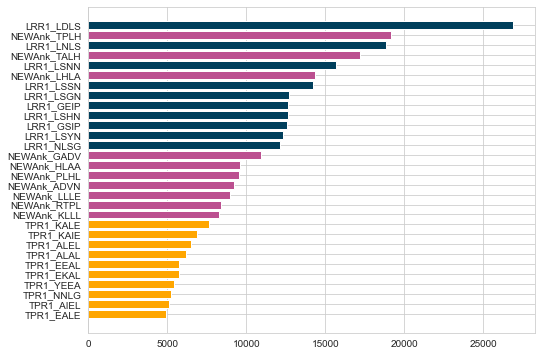

In [30]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df_tops_sorted['family_mr'], df_tops_sorted['frequency'], color=df_tops_sorted['family_color'])

In [31]:
# ---------------------------------------------------
# ------ VER ANTES: compare_rules.py de exp misterioso
# python3 compare_rules.py --family_a=NEWAnk_len4_ALL_sub --family_b=NEWAnk_len4_nomrs --support=0.025 --confidence=0.9
# ---------------------------------------------------

# Exp: Comparaciones en items mas frecuentes de txs en NEWAnk, NEWAnk_SCRAMBLED, NEWAnk_nomrs

In [41]:
# TODO: Mover esto a python
from typing import NamedTuple

class FamilyInput(NamedTuple):
    family: str
    transactions_name: str
    color_code: str

def build_top_frequency_df(df_frequencies, top_amount=10):
    df_tops = df_frequencies[ df_frequencies.groupby('family')['freq'].rank(ascending=False) <= top_amount ]
    return df_tops


def build_color_map(family_inputs):
    return { fi.family: fi.color_code for fi in family_inputs }

In [42]:
newank_input = FamilyInput("NEWAnk", "NEWAnk_len4_ALL_sub", "#bc5090")
newank_scrambled_input = FamilyInput("NEWAnk_SCRAMBLED", "NEWAnk_SCRAMBLED_len4_ALL_sub", "#ffa600")
newank_nomrs_input = FamilyInput("NEWAnk_nomrs", "NEWAnk_len4_nomrs", "#003f5c")

family_inputs = [
    newank_input, newank_scrambled_input, newank_nomrs_input
]

txs_by_family = { 
    fi.family: autils.read_clean_transactions(fi.transactions_name, "output/clean_transactions")
    for fi in family_inputs
}

df_freq_data = autils.build_mr_tx_frequency_df(txs_by_family)

df_tops = build_top_frequency_df(df_freq_data, 30)
color_map = build_color_map(family_inputs)

Building mr_tx_frequency for NEWAnk
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_SCRAMBLED
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169
Building mr_tx_frequency for NEWAnk_nomrs
 .... freq_count .... 0/32169
 .... freq_count .... 10000/32169
 .... freq_count .... 20000/32169
 .... freq_count .... 30000/32169


In [43]:
color_map

{'NEWAnk': '#bc5090', 'NEWAnk_SCRAMBLED': '#ffa600', 'NEWAnk_nomrs': '#003f5c'}

In [44]:
def sorted_df_to_plot(df_tops, color_map):
    df_tops_sorted = df_tops.sort_values(by='freq')
    df_tops_sorted.loc[:,'family_mr'] = df_tops_sorted['family'] + "_" + df_tops_sorted['mr']
    df_tops_sorted['family_color'] = [ color_map[f] for f in df_tops_sorted['family'] ]
    return df_tops_sorted


<BarContainer object of 90 artists>

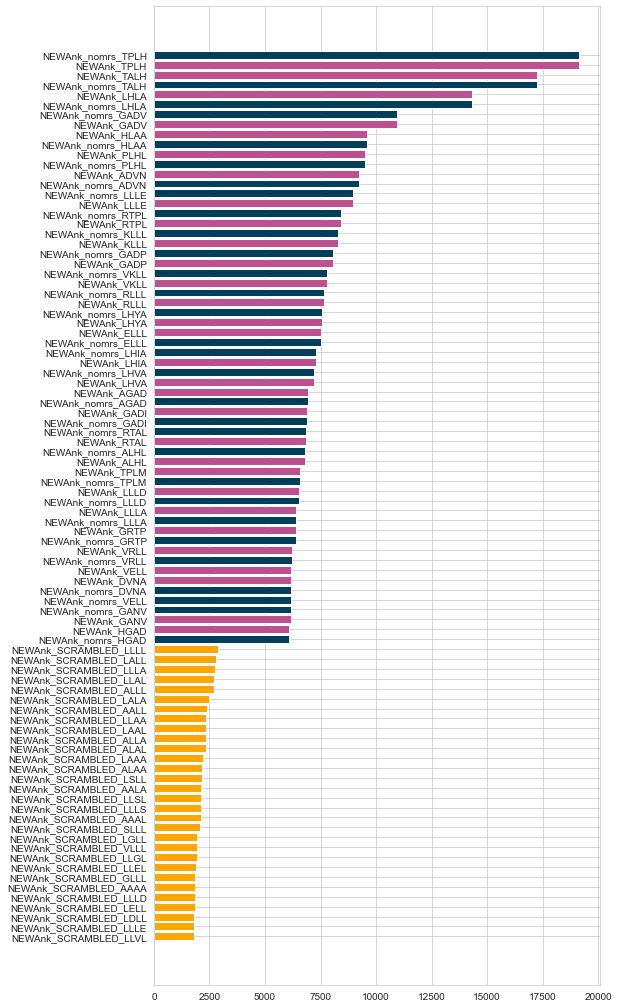

In [45]:
df_tops_sorted = sorted_df_to_plot(df_tops, color_map)
fig, ax = plt.subplots(figsize=(8,18))
ax.barh(df_tops_sorted['family_mr'], df_tops_sorted['freq'], color=df_tops_sorted['family_color'])

# Los MRs mas frecuentes coinciden con los substrings mas frecuentes.
# Me imagino que son los X mas frecuentes los que determinan las reglas, por eso las reglas terminan siendo iguales

# TODO: la alternancia rara es solo visual, deberia poder ordenarlos por string para desempatar

In [49]:
# TODO: Ver frecuentes en las intersecciones

In [50]:
# Exp: Analisis de frecuencias.
#  Cuantos items aparecen en el x% de las transacciones?

In [51]:
set(df_freq_data['family'])

{'NEWAnk', 'NEWAnk_SCRAMBLED', 'NEWAnk_nomrs'}

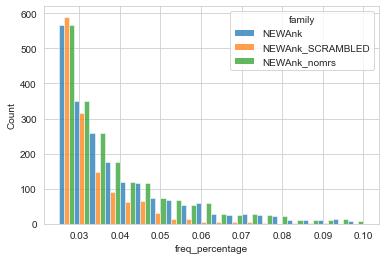

In [52]:
sns.histplot(df_freq_data, x='freq_percentage', hue='family', multiple='dodge', bins=20, binrange=(0.025, 0.1));
# NEWAnk y nomrs son identicos en los de mayor aparicion (menor support)
# Si parece haber diferencias es solo visual, ver sig grafico

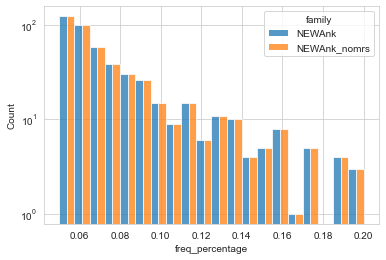

In [62]:
sns.histplot(df_freq_data[df_freq_data.family != "NEWAnk_SCRAMBLED"], 
             x='freq_percentage', hue='family', multiple='dodge', bins=20, 
             binrange=(0.05, 0.20), log_scale=(False, True));

In [ ]:
# Veo pares de items: es lo que importa para generar reglas

In [53]:
min_support = 0.025
df_freq_pairs_data = autils.build_pairs_mr_tx_frequency_df(
    txs_by_family, df_freq_data, min_support)

build_pairs_mr_tx_frequency_df, min_support: 0.025
Filtering mrs to get most frequents only
Building freqs_by_pair_combinations for NEWAnk...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk...
NEWAnk ready.
Building freqs_by_pair_combinations for NEWAnk_SCRAMBLED...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk_SCRAMBLED...
NEWAnk_SCRAMBLED ready.
Building freqs_by_pair_combinations for NEWAnk_nomrs...
Filtering transactions_frequents
 .... 0/32169
 .... 10000/32169
 .... 20000/32169
 .... 30000/32169
Building freqs_by_pair_data for NEWAnk_nomrs...
NEWAnk_nomrs ready.


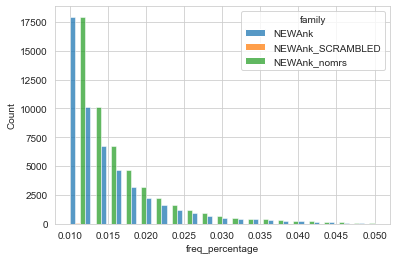

In [58]:
sns.histplot(df_freq_pairs_data, x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.010, 0.05));

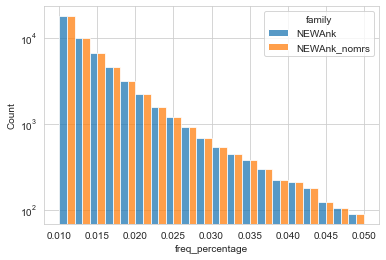

In [63]:
sns.histplot(df_freq_pairs_data[df_freq_pairs_data.family != "NEWAnk_SCRAMBLED"], 
             x='freq_percentage', hue='family', 
             multiple='dodge', bins=20, binrange=(0.010, 0.05),
             log_scale=(False, True)
            );
# Escala log en y
# Esto explica por que generan exactamente las mismas reglas

In [64]:
# Sanity check: las transacciones NEWAnk y NEWAnk_nomrs son distintas
# (esto se puede ver con el compare_rules.py , pero veamoslo graficamente ...)

In [65]:
df_txs_length = autils.build_transaction_len_df(txs_by_family)

Building transaction_len_df for NEWAnk
Building transaction_len_df for NEWAnk_SCRAMBLED
Building transaction_len_df for NEWAnk_nomrs


In [72]:
df_txs_length.groupby('family').describe()
# NEWAnk y nomrs son practicamente iguales. En promedio nomrs es levemente mayor (tiene sentido)

tx_length                                                     \
                     count        mean         std   min    25%    50%    75%   
family                                                                          
NEWAnk             32169.0  687.846902  475.868414  34.0  339.0  557.0  920.0   
NEWAnk_SCRAMBLED   32169.0  707.733781  488.648890  60.0  352.0  570.0  943.0   
NEWAnk_nomrs       32169.0  687.919736  475.920511  34.0  339.0  557.0  920.0   

                          
                     max  
family                    
NEWAnk            6260.0  
NEWAnk_SCRAMBLED  6644.0  
NEWAnk_nomrs      6262.0

In [73]:
# df_txs_length.boxplot(column='tx_length', by='family', grid=True, rot=90, figsize=(9, 7))

In [ ]:
# Veamos los MRs...

In [69]:
mrs_by_family = {family: all_mrs_from_transactions(txs) 
                 for family, txs in txs_by_family.items()}

unique_mrs_by_family = {family: set(mrs) 
                 for family, mrs in mrs_by_family.items()}

In [70]:
df_mrs_length = autils.build_mr_len_df(unique_mrs_by_family)
df_mrs_length.groupby(['family', 'mr_length']).agg({'mr_length': 'count'})

Building mr_len_df for NEWAnk
Building mr_len_df for NEWAnk_SCRAMBLED
Building mr_len_df for NEWAnk_nomrs


mr_length
family           mr_length           
NEWAnk           4             158105
                 5                  2
NEWAnk_SCRAMBLED 4             159639
NEWAnk_nomrs     4             159450

In [74]:
# NEWAnk y NEWAnk_nomrs se ven practicamente iguales, me cuesta encontrar algo en que se diferencien